In [239]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Final_dataset.csv') # load the dataset
df.head()

,PROSPECTID,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,...,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
0,1,549.0,35.0,15.0,11,29.0,29,0,0,0,...,0,0,1,0,4,1,4,0,72.0,18.0
1,2,47.0,NaN,NaN,0,NaN,0,0,0,0,...,0,1,0,0,0,0,1,0,7.0,7.0
2,3,302.0,11.0,3.0,9,25.0,25,1,9,8,...,0,6,1,0,0,2,6,0,47.0,2.0
3,4,NaN,NaN,NaN,0,NaN,0,0,0,0,...,0,0,0,0,0,0,1,1,5.0,5.0
4,5,583.0,NaN,NaN,0,NaN,0,0,0,0,...,0,0,0,0,0,3,0,2,131.0,32.0


In [3]:
df.shape

(51336, 87)

## Droping the Credit Score Column

In [4]:
df.drop(columns=['Credit_Score'],inplace=True) # Droping the Credit_Score column

In [5]:
df.shape

(51336, 86)

In [6]:
df.head()

,PROSPECTID,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,...,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
0,1,549.0,35.0,15.0,11,29.0,29,0,0,0,...,0,0,1,0,4,1,4,0,72.0,18.0
1,2,47.0,NaN,NaN,0,NaN,0,0,0,0,...,0,1,0,0,0,0,1,0,7.0,7.0
2,3,302.0,11.0,3.0,9,25.0,25,1,9,8,...,0,6,1,0,0,2,6,0,47.0,2.0
3,4,NaN,NaN,NaN,0,NaN,0,0,0,0,...,0,0,0,0,0,0,1,1,5.0,5.0
4,5,583.0,NaN,NaN,0,NaN,0,0,0,0,...,0,0,0,0,0,3,0,2,131.0,32.0


## Target Definition

In [7]:
replce_dict={'P1':'0','P2':'0','P3':'1','P4':'1'}
df['Approved_Flag']=df['Approved_Flag'].replace(replce_dict)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 86 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PROSPECTID                    51336 non-null  int64  
 1   time_since_recent_payment     47045 non-null  float64
 2   time_since_first_deliquency   15387 non-null  float64
 3   time_since_recent_deliquency  15387 non-null  float64
 4   num_times_delinquent          51336 non-null  int64  
 5   max_delinquency_level         15387 non-null  float64
 6   max_recent_level_of_deliq     51336 non-null  int64  
 7   num_deliq_6mts                51336 non-null  int64  
 8   num_deliq_12mts               51336 non-null  int64  
 9   num_deliq_6_12mts             51336 non-null  int64  
 10  max_deliq_6mts                38446 non-null  float64
 11  max_deliq_12mts               40504 non-null  float64
 12  num_times_30p_dpd             51336 non-null  int64  
 13  n

In [9]:
df['Approved_Flag'].value_counts()

Approved_Flag
0    38002
1    13334
Name: count, dtype: int64

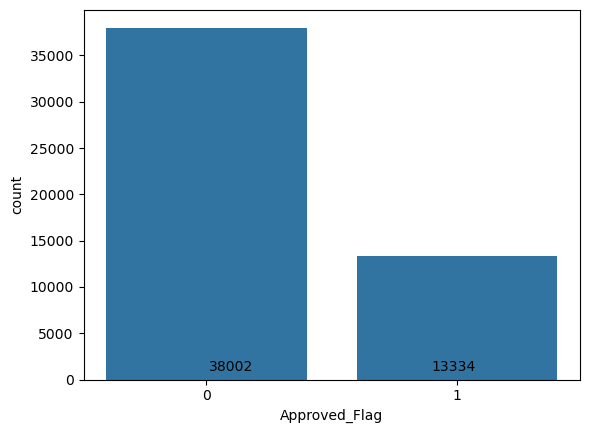

In [10]:
sns.countplot(x=df['Approved_Flag']).plot()
plt.text(x=0.01,y=900,s=df[df['Approved_Flag']=='0'].shape[0])
plt.text(x=0.9,y=900,s=df[df['Approved_Flag']=='1'].shape[0])
plt.show()

## Defining of null Values

In [11]:
df.isnull().sum()

PROSPECTID                          0
time_since_recent_payment        4291
time_since_first_deliquency     35949
time_since_recent_deliquency    35949
num_times_delinquent                0
                                ...  
Secured_TL                          0
Unsecured_TL                        0
Other_TL                            0
Age_Oldest_TL                      40
Age_Newest_TL                      40
Length: 86, dtype: int64

In [12]:
df_perce_null=df.isnull().sum(axis=1)/df.shape[0]*100
df_perce_null

0        0.005844
1        0.009740
2        0.003896
3        0.037011
4        0.015584
           ...   
51331    0.003896
51332    0.009740
51333    0.009740
51334    0.009740
51335    0.015584
Length: 51336, dtype: float64

#### Checking the dtypes and seperating the Categorical and Numerical columns

In [13]:
df_num=df.select_dtypes(include=np.number)
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 80 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PROSPECTID                    51336 non-null  int64  
 1   time_since_recent_payment     47045 non-null  float64
 2   time_since_first_deliquency   15387 non-null  float64
 3   time_since_recent_deliquency  15387 non-null  float64
 4   num_times_delinquent          51336 non-null  int64  
 5   max_delinquency_level         15387 non-null  float64
 6   max_recent_level_of_deliq     51336 non-null  int64  
 7   num_deliq_6mts                51336 non-null  int64  
 8   num_deliq_12mts               51336 non-null  int64  
 9   num_deliq_6_12mts             51336 non-null  int64  
 10  max_deliq_6mts                38446 non-null  float64
 11  max_deliq_12mts               40504 non-null  float64
 12  num_times_30p_dpd             51336 non-null  int64  
 13  n

In [14]:
df_cat=df.select_dtypes(exclude=np.number)
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   MARITALSTATUS    51336 non-null  object
 1   EDUCATION        51336 non-null  object
 2   GENDER           51336 non-null  object
 3   last_prod_enq2   51336 non-null  object
 4   first_prod_enq2  51336 non-null  object
 5   Approved_Flag    51336 non-null  object
dtypes: object(6)
memory usage: 2.4+ MB


## Categorical column listing

In [15]:
df_cat['MARITALSTATUS'].value_counts()

MARITALSTATUS
Married    37752
Single     13584
Name: count, dtype: int64

In [16]:
df_cat['EDUCATION'].value_counts()

EDUCATION
GRADUATE          16673
12TH              14467
SSC                9276
UNDER GRADUATE     5492
OTHERS             2917
POST-GRADUATE      2242
PROFESSIONAL        269
Name: count, dtype: int64

In [17]:
replace_dict_ed={'UNDER GRADUATE':'GRADUATE','PROFESSIONAL':'OTHERS'}
df_cat['EDUCATION']=df_cat['EDUCATION'].replace(replace_dict_ed)
df_cat['EDUCATION'].value_counts()

EDUCATION
GRADUATE         22165
12TH             14467
SSC               9276
OTHERS            3186
POST-GRADUATE     2242
Name: count, dtype: int64

In [18]:
df_cat['GENDER'].value_counts()

GENDER
M    45245
F     6091
Name: count, dtype: int64

In [19]:
df_cat['last_prod_enq2'].value_counts()

last_prod_enq2
others          20831
ConsumerLoan    17793
PL               7959
CC               2339
AL               1511
HL                903
Name: count, dtype: int64

In [20]:
df_cat['first_prod_enq2'].value_counts()

first_prod_enq2
others          28120
ConsumerLoan    11860
PL               4889
AL               2870
CC               2188
HL               1409
Name: count, dtype: int64

## Describing the Numerical and categorical Columns

In [21]:
df_num.describe()

,PROSPECTID,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,...,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
count,51336.000000,47045.000000,15387.000000,15387.000000,51336.000000,15387.000000,51336.000000,51336.000000,51336.000000,51336.000000,...,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51296.000000,51296.000000
mean,25668.500000,249.463599,20.318646,12.696757,1.573749,74.047573,13.521953,0.184977,0.480053,0.295076,...,0.124981,1.136084,1.561847,0.070146,0.282511,2.844904,2.013694,1.089762,45.376969,15.780022
std,14819.571046,467.777931,10.831259,9.499626,4.165012,121.318443,53.336976,0.710240,1.522210,1.027471,...,0.505201,2.227997,5.376434,0.340861,0.858168,6.187177,3.198322,2.417496,41.737151,21.995676
min,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12834.750000,52.000000,10.000000,4.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,4.000000
50%,25668.500000,74.000000,21.000000,10.000000,0.000000,33.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,33.000000,8.000000
75%,38502.250000,195.000000,31.000000,20.000000,1.000000,83.000000,10.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,3.000000,2.000000,1.000000,64.000000,17.000000
max,51336.000000,6065.000000,35.000000,35.000000,74.000000,900.000000,900.000000,12.000000,28.000000,20.000000,...,27.000000,41.000000,235.000000,10.000000,29.000000,235.000000,55.000000,80.000000,392.000000,392.000000


In [22]:
df_cat.describe()

,MARITALSTATUS,EDUCATION,GENDER,last_prod_enq2,first_prod_enq2,Approved_Flag
count,51336,51336,51336,51336,51336,51336
unique,2,5,2,6,6,2
top,Married,GRADUATE,M,others,others,0
freq,37752,22165,45245,20831,28120,38002


### Defining missing Value 

In [23]:
df_num.dropna(axis=1,thresh=df_num.shape[0]*.75,inplace=True)

In [24]:
df_num.nunique()

PROSPECTID                   51336
time_since_recent_payment     2434
num_times_delinquent            64
max_recent_level_of_deliq      399
num_deliq_6mts                  13
                             ...  
Secured_TL                     103
Unsecured_TL                    49
Other_TL                        47
Age_Oldest_TL                  294
Age_Newest_TL                  213
Length: 73, dtype: int64

In [25]:
df_num.head()

,PROSPECTID,time_since_recent_payment,num_times_delinquent,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,max_deliq_12mts,num_times_30p_dpd,num_times_60p_dpd,...,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
0,1,549.0,11,29,0,0,0,NaN,0,0,...,0,0,1,0,4,1,4,0,72.0,18.0
1,2,47.0,0,0,0,0,0,0.0,0,0,...,0,1,0,0,0,0,1,0,7.0,7.0
2,3,302.0,9,25,1,9,8,25.0,0,0,...,0,6,1,0,0,2,6,0,47.0,2.0
3,4,NaN,0,0,0,0,0,NaN,0,0,...,0,0,0,0,0,0,1,1,5.0,5.0
4,5,583.0,0,0,0,0,0,NaN,0,0,...,0,0,0,0,0,3,0,2,131.0,32.0


In [26]:
columns_to_drop=[i for i in df_cat if df_cat[i].nunique()>60]
df_cat.drop(columns=columns_to_drop,inplace=True)

## Encoding

In [27]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   MARITALSTATUS    51336 non-null  object
 1   EDUCATION        51336 non-null  object
 2   GENDER           51336 non-null  object
 3   last_prod_enq2   51336 non-null  object
 4   first_prod_enq2  51336 non-null  object
 5   Approved_Flag    51336 non-null  object
dtypes: object(6)
memory usage: 2.4+ MB


In [28]:
df_target=df_cat['Approved_Flag']

In [29]:
df_cat.drop(columns='Approved_Flag',inplace=True)

In [30]:
df_cat.columns

Index(['MARITALSTATUS', 'EDUCATION', 'GENDER', 'last_prod_enq2',
       'first_prod_enq2'],
      dtype='object')

In [31]:
dummy_var=pd.get_dummies(data=df_cat,drop_first=True).replace({True:'1',False:'0'})

In [32]:
dummy_var

,MARITALSTATUS_Single,EDUCATION_GRADUATE,EDUCATION_OTHERS,EDUCATION_POST-GRADUATE,EDUCATION_SSC,GENDER_M,last_prod_enq2_CC,last_prod_enq2_ConsumerLoan,last_prod_enq2_HL,last_prod_enq2_PL,last_prod_enq2_others,first_prod_enq2_CC,first_prod_enq2_ConsumerLoan,first_prod_enq2_HL,first_prod_enq2_PL,first_prod_enq2_others
0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
1,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1
3,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1
4,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51331,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0
51332,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1
51333,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1
51334,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [33]:
print(dummy_var.columns)

Index(['MARITALSTATUS_Single', 'EDUCATION_GRADUATE', 'EDUCATION_OTHERS',
       'EDUCATION_POST-GRADUATE', 'EDUCATION_SSC', 'GENDER_M',
       'last_prod_enq2_CC', 'last_prod_enq2_ConsumerLoan', 'last_prod_enq2_HL',
       'last_prod_enq2_PL', 'last_prod_enq2_others', 'first_prod_enq2_CC',
       'first_prod_enq2_ConsumerLoan', 'first_prod_enq2_HL',
       'first_prod_enq2_PL', 'first_prod_enq2_others'],
      dtype='object')


In [34]:
# None of the column has been droped because there are no columns has unique_value>60 in the columns.

## Missing Value treatment of both the data-types

In [35]:
null=df_num.columns[df_num.isnull().any()]
df_null=df[null]
df_null.columns

Index(['time_since_recent_payment', 'max_deliq_12mts', 'tot_enq', 'CC_enq',
       'CC_enq_L6m', 'CC_enq_L12m', 'PL_enq', 'PL_enq_L6m', 'PL_enq_L12m',
       'time_since_recent_enq', 'enq_L12m', 'enq_L6m', 'enq_L3m',
       'pct_currentBal_all_TL', 'Age_Oldest_TL', 'Age_Newest_TL'],
      dtype='object')

In [36]:
df_num[['max_deliq_12mts']].isnull().sum()

max_deliq_12mts    10832
dtype: int64

In [37]:
df_num['max_deliq_12mts']=df_num['max_deliq_12mts'].fillna(0) # make it to 0 because delay

In [38]:
df_num['max_deliq_12mts'].isnull().sum()

0

In [39]:
df_num=df_num.apply(lambda x:x.fillna(x.median()))

In [40]:
df_num.isnull().sum()

PROSPECTID                   0
time_since_recent_payment    0
num_times_delinquent         0
max_recent_level_of_deliq    0
num_deliq_6mts               0
                            ..
Secured_TL                   0
Unsecured_TL                 0
Other_TL                     0
Age_Oldest_TL                0
Age_Newest_TL                0
Length: 73, dtype: int64

In [41]:
df_cat.isnull().sum() # there no missing value in the categorical column

MARITALSTATUS      0
EDUCATION          0
GENDER             0
last_prod_enq2     0
first_prod_enq2    0
dtype: int64

In [42]:
# Droping the ProspectID Column because it does't make any sense in the model building
df_num.drop(columns='PROSPECTID',inplace=True)

In [43]:
df_num.shape

(51336, 72)

In [44]:
# In this cell we are concating the all the numerical,categorical and also df_mean(this column filled by mean values)
df_feature=pd.concat([df_num,dummy_var],axis=1)

In [45]:
df_feature.shape

(51336, 88)

In [46]:
df_feature.head(2)

,time_since_recent_payment,num_times_delinquent,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,max_deliq_12mts,num_times_30p_dpd,num_times_60p_dpd,num_std,...,last_prod_enq2_CC,last_prod_enq2_ConsumerLoan,last_prod_enq2_HL,last_prod_enq2_PL,last_prod_enq2_others,first_prod_enq2_CC,first_prod_enq2_ConsumerLoan,first_prod_enq2_HL,first_prod_enq2_PL,first_prod_enq2_others
0,549.0,11,29,0,0,0,0.0,0,0,21,...,0,0,0,1,0,0,0,0,1,0
1,47.0,0,0,0,0,0,0.0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


## Statstical Test

In [47]:
# Shapiro Test- This for a normality of the data.
from scipy import stats
from scipy.stats import shapiro

In [48]:
from warnings import filterwarnings
filterwarnings('ignore')
for i in df_num:
    g1=df_num[i]
    print(i,stats.shapiro(g1))

time_since_recent_payment ShapiroResult(statistic=0.470328318430008, pvalue=2.6057385757430175e-144)
num_times_delinquent ShapiroResult(statistic=0.4294401464305525, pvalue=1.2988008096366056e-146)
max_recent_level_of_deliq ShapiroResult(statistic=0.23245852619507812, pvalue=5.587706322680383e-156)
num_deliq_6mts ShapiroResult(statistic=0.28716756229185303, pvalue=1.2884183822576367e-153)
num_deliq_12mts ShapiroResult(statistic=0.35978610853626825, pvalue=3.241257579141646e-150)
num_deliq_6_12mts ShapiroResult(statistic=0.3238913653562786, pvalue=6.151072350679607e-152)
max_deliq_12mts ShapiroResult(statistic=0.18785913900577844, pvalue=8.514739645951733e-158)
num_times_30p_dpd ShapiroResult(statistic=0.28819013600430843, pvalue=1.431353411521129e-153)
num_times_60p_dpd ShapiroResult(statistic=0.20747655685023214, pvalue=5.225359199078198e-157)
num_std ShapiroResult(statistic=0.4876372568106909, pvalue=2.7458362294211025e-143)
num_std_6mts ShapiroResult(statistic=0.5028702829987657, pv

## Scaling

In [49]:
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

In [50]:
ss=StandardScaler()

In [51]:
X=df_feature
y=df_target

In [52]:
X_scaled=ss.fit_transform(X)

In [53]:
x=pd.DataFrame(X_scaled,columns=df_feature.columns)
x.head()

,time_since_recent_payment,num_times_delinquent,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,max_deliq_12mts,num_times_30p_dpd,num_times_60p_dpd,num_std,...,last_prod_enq2_CC,last_prod_enq2_ConsumerLoan,last_prod_enq2_HL,last_prod_enq2_PL,last_prod_enq2_others,first_prod_enq2_CC,first_prod_enq2_ConsumerLoan,first_prod_enq2_HL,first_prod_enq2_PL,first_prod_enq2_others
0,0.697574,2.263221,0.290196,-0.260446,-0.315369,-0.287189,-0.206047,-0.263888,-0.203186,0.553546,...,-0.218489,-0.728322,-0.133809,2.334536,-0.826360,-0.210994,-0.548120,-0.167992,3.082257,-1.100561
1,-0.416936,-0.377854,-0.253522,-0.260446,-0.315369,-0.287189,-0.206047,-0.263888,-0.203186,-0.431968,...,-0.218489,1.373018,-0.133809,-0.428351,-0.826360,-0.210994,1.824417,-0.167992,-0.324438,-1.100561
2,0.149200,1.783026,0.215201,1.147543,5.597144,7.498994,0.503100,-0.263888,-0.203186,0.037324,...,-0.218489,1.373018,-0.133809,-0.428351,-0.826360,-0.210994,-0.548120,-0.167992,-0.324438,0.908628
3,-0.356992,-0.377854,-0.253522,-0.260446,-0.315369,-0.287189,-0.206047,-0.263888,-0.203186,-0.197322,...,-0.218489,-0.728322,-0.133809,-0.428351,1.210126,-0.210994,-0.548120,-0.167992,-0.324438,0.908628
4,0.773059,-0.377854,-0.253522,-0.260446,-0.315369,-0.287189,-0.206047,-0.263888,-0.203186,2.055282,...,-0.218489,-0.728322,-0.133809,-0.428351,-0.826360,-0.210994,-0.548120,-0.167992,-0.324438,-1.100561


## Model Building

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,df_target,train_size=.70,test_size=.30,random_state=42)
print('X_train', x_train.shape)
print('y_train', y_train.shape)
print('X_test', x_test.shape)
print('y_test', y_test.shape)

X_train (35935, 88)
y_train (35935,)
X_test (15401, 88)
y_test (15401,)


##  Logistic Regression

In [56]:
import warnings 
warnings.filterwarnings('ignore')
lr=LogisticRegression()
log_model=lr.fit(x_train,y_train)

In [57]:
log_model

LogisticRegression()

In [58]:
y_pred=lr.predict(x_test)

In [59]:
y_pred

array(['1', '0', '0', ..., '0', '1', '1'], dtype=object)

In [60]:
accuracy=accuracy_score(y_test,y_pred)
conf_matrix=confusion_matrix(y_test,y_pred)
report=classification_report(y_test,y_pred)

In [61]:
print(f"Accuracy: {accuracy}")

Accuracy: 0.8552042075189923


In [62]:
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[10801   548]
 [ 1682  2370]]


In [63]:
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     11349
           1       0.81      0.58      0.68      4052

    accuracy                           0.86     15401
   macro avg       0.84      0.77      0.79     15401
weighted avg       0.85      0.86      0.85     15401



## Randomforest Model

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
rf=RandomForestClassifier()
rf_model=rf.fit(x_train,y_train)

In [66]:
rf_model

RandomForestClassifier()

In [67]:
y_pred_rf=rf.predict(x_test)

In [68]:
y_pred_rf

array(['1', '0', '0', ..., '0', '1', '1'], dtype=object)

In [69]:
accuracy=accuracy_score(y_test,y_pred_rf)
conf_matrix=confusion_matrix(y_test,y_pred_rf)
report=classification_report(y_test,y_pred_rf)

In [70]:
print(f"Accuracy: {accuracy}")

Accuracy: 0.8757872865398351


In [71]:
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[10752   597]
 [ 1316  2736]]


In [72]:
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     11349
           1       0.82      0.68      0.74      4052

    accuracy                           0.88     15401
   macro avg       0.86      0.81      0.83     15401
weighted avg       0.87      0.88      0.87     15401



In [73]:
important_features = pd.DataFrame({'Features': x_train.columns,
                                   'Importance': rf_model.feature_importances_})
# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)
important_features.head(15)

,Features,Importance
32,enq_L3m,0.092877
29,time_since_recent_enq,0.066658
31,enq_L6m,0.062579
70,Age_Oldest_TL,0.059192
30,enq_L12m,0.033275
43,pct_PL_enq_L6m_of_ever,0.032740
2,max_recent_level_of_deliq,0.030365
21,recent_level_of_deliq,0.027727
35,Time_With_Curr_Empr,0.026532
0,time_since_recent_payment,0.026465


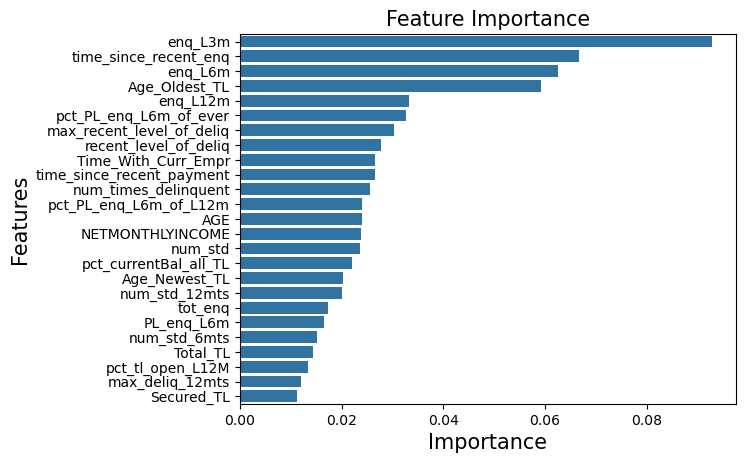

In [74]:
sns.barplot(x='Importance',y='Features',data=important_features.head(25))
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)
plt.show()

#### Random Forest Tuning

In [76]:
from sklearn.model_selection import GridSearchCV

In [86]:
tuned_parameters=[{
                #'criterion':['entropy','gini'],
                  'n_estimators': range(10,160,20),
                  'max_depth':[4,8,12,16],
                  'max_features':['sqrt','log2,5'],
                    'min_samples_split': [2, 5, 8, 11],
                      #'min_samples_leaf': [1, 5, 9],
          #'max_leaf_nodes': [2, 5, 8, 11]
                    }]

# instantiate the 'RandomForest'
random_forest_classification=RandomForestClassifier(random_state=0)

# use Gridsearch(CV) to find the optimal value of hyperparameter
rf_grid=GridSearchCV(estimator=random_forest_classification,param_grid=tuned_parameters,
                    cv=5)
rf_grid_model=rf_grid.fit(x_train,y_train) # perform grid
# get best parameters
print('Best parameter ',rf_grid_model.best_params_)

Best parameter  {'max_depth': 16, 'max_features': 'sqrt', 'min_samples_split': 11, 'n_estimators': 150}


In [85]:
rf_grid_model

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid=[{'max_depth': [4, 8, 12, 16],
                          'max_features': ['sqrt', 'log2,5'],
                          'min_samples_split': [2, 5, 8, 11],
                          'n_estimators': range(10, 160, 20)}])

In [81]:
# building model using tuned hyperparmetes
rf_tuned_model=RandomForestClassifier(#criterion=rf_grid_model.best_params_.get('Critesion'),
                               n_estimators=rf_grid_model.best_params_.get('n_estimators'),
                               max_depth=rf_grid_model.best_params_.get('max_depth'),
                               max_features=rf_grid_model.best_params_.get('max_feature'),
                                min_samples_split=rf_grid_model.best_params_.get('min_samples_split'),  #max_leaf_nodes=rf_grid_model.best_params_.get('max_leaf_nodes'),
                               #min_samples_leaf=rf_grid_model.best_params_.get('min_samples_leaf'),
                               random_state=0,oob_score=True)


In [87]:
rf_tuned_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=16, max_features=None, min_samples_split=11,
                       n_estimators=150, oob_score=True, random_state=0)

In [88]:
y_pred_rf_tu=rf_tuned_model.predict(x_test)

In [89]:
accuracy_rf_tu=accuracy_score(y_test,y_pred_rf_tu)
conf_matrix_rf_tu=confusion_matrix(y_test,y_pred_rf_tu)
report_rf_tu=classification_report(y_test,y_pred_rf_tu)

In [90]:
print(f"Accuracy: {accuracy_rf_tu}")

Accuracy: 0.878124797091098


In [91]:
print("Confusion Matrix:")
print(conf_matrix_rf_tu)

Confusion Matrix:
[[10683   666]
 [ 1211  2841]]


In [92]:
print("Classification Report:")
print(report_rf_tu)

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     11349
           1       0.81      0.70      0.75      4052

    accuracy                           0.88     15401
   macro avg       0.85      0.82      0.84     15401
weighted avg       0.88      0.88      0.88     15401



## Decision Tree Model

In [93]:
from sklearn.tree import DecisionTreeClassifier

In [95]:
dt=DecisionTreeClassifier()
dt_model=dt.fit(x_train,y_train)

In [96]:
y_pred_dt=dt.predict(x_test)

In [97]:
accuracy_dt=accuracy_score(y_test,y_pred_dt)
conf_matrix_dt=confusion_matrix(y_test,y_pred_dt)
report_dt=classification_report(y_test,y_pred_dt)

In [98]:
print(f"Accuracy: {accuracy_dt}")

Accuracy: 0.8313096552171937


In [99]:
print("Confusion Matrix:")
print(conf_matrix_dt)

Confusion Matrix:
[[10069  1280]
 [ 1318  2734]]


In [100]:
print("Classification Report:")
print(report_dt)

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.89     11349
           1       0.68      0.67      0.68      4052

    accuracy                           0.83     15401
   macro avg       0.78      0.78      0.78     15401
weighted avg       0.83      0.83      0.83     15401



#### Decision Tree Tuned model

In [103]:
tuned_parameters=[{
                'criterion':['entropy','gini'],
                  #'n_estimators': range(10,160,20),
                  'max_depth':[4,8,12,16],
                  'max_features':['sqrt','log2','auto'],
                    'min_samples_split': [2, 5, 8, 11],
                      #'min_samples_leaf': [1, 5, 9],
          #'max_leaf_nodes': [2, 5, 8, 11]
                    }]

# instantiate the 'RandomForest'
dt_classification=DecisionTreeClassifier(random_state=0)

# use Gridsearch(CV) to find the optimal value of hyperparameter
dt_grid=GridSearchCV(estimator=dt_classification,param_grid=tuned_parameters,
                    cv=5)
dt_grid_model=dt_grid.fit(x_train,y_train) # perform grid
# get best parameters
print('Best parameter ',dt_grid_model.best_params_)

Best parameter  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_split': 8}


In [147]:
dt_model_tuned=DecisionTreeClassifier(#criterion=tree_grid_model.best_params_.get('Critesion'),
                               max_depth=dt_grid_model.best_params_.get('max_depth'),
                               #max_features=tree_grid_model.best_params_.get('max_feature'),
                               #max_leaf_nodes=tree_grid_model.best_params_.get('max_leaf_nodes'),
                               #min_samples_leaf=dt_grid_model.best_params_.get('min_samples_leaf'),
                               min_samples_split=dt_grid_model.best_params_.get('min_samples_split'),
                               random_state=0)

In [148]:
dt_model_tuned.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=8, min_samples_split=8, random_state=0)

In [149]:
y_pred_dt_tu=rf_tuned_model.predict(x_test)

In [150]:
accuracy_dt_tu=accuracy_score(y_test,y_pred_dt_tu)
conf_matrix_dt_tu=confusion_matrix(y_test,y_pred_dt_tu)
report_dt_tu=classification_report(y_test,y_pred_dt_tu)

In [151]:
print(f"Accuracy: {accuracy_dt_tu}")

Accuracy: 0.878124797091098


In [152]:
print("Confusion Matrix:")
print(conf_matrix_dt_tu)

Confusion Matrix:
[[10683   666]
 [ 1211  2841]]


In [153]:
print("Classification Report:")
print(report_dt_tu)

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     11349
           1       0.81      0.70      0.75      4052

    accuracy                           0.88     15401
   macro avg       0.85      0.82      0.84     15401
weighted avg       0.88      0.88      0.88     15401



## ADA Boost Model

In [114]:
from sklearn.ensemble import AdaBoostClassifier

In [115]:
ad=AdaBoostClassifier()
ada_model=ad.fit(x_train,y_train)

In [116]:
y_pred_ad=ad.predict(x_test)

In [117]:
accuracy_ada=accuracy_score(y_test,y_pred_ad)
conf_matrix_ada=confusion_matrix(y_test,y_pred_ad)
report_ada=classification_report(y_test,y_pred_ad)

In [118]:
print(f"Accuracy: {accuracy_ada}")

Accuracy: 0.8704629569508473


In [119]:
print("Confusion Matrix:")
print(conf_matrix_ada)

Confusion Matrix:
[[10716   633]
 [ 1362  2690]]


In [120]:
print("Classification Report:")
print(report_ada)

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91     11349
           1       0.81      0.66      0.73      4052

    accuracy                           0.87     15401
   macro avg       0.85      0.80      0.82     15401
weighted avg       0.87      0.87      0.87     15401



### ADA Boost Tuned Model

In [127]:
tuned_parameters=[{
                #'criterion':['entropy','gini'],
                'n_estimators':range(10,160,20),
                'learning_rate':[0.01,0.1,1.0,10.0],
                  
                 
                    }]

# instantiate the 'RandomForest'
ada_classification=AdaBoostClassifier(random_state=0)

# use Gridsearch(CV) to find the optimal value of hyperparameter
ada_grid=GridSearchCV(estimator=ada_classification,param_grid=tuned_parameters,
                    cv=5)
ada_grid_model=ada_grid.fit(x_train,y_train) # perform grid
# get best parameters
print('Best parameter ',ada_grid_model.best_params_)

Best parameter  {'learning_rate': 1.0, 'n_estimators': 130}


In [130]:
# building model using tuned hyperparmetes
ada_tuned_model=AdaBoostClassifier(#criterion=rf_grid_model.best_params_.get('Critesion'),
                               n_estimators=ada_grid_model.best_params_.get('n_estimators'),
                                learning_rate=ada_grid_model.best_params_.get('learning_rate'),
                                
                                #max_depth=dt_grid_model.best_params_.get('max_depth'),
                               #max_features=dt_grid_model.best_params_.get('max_feature'),
                                #min_samples_split=dt_grid_model.best_params_.get('min_samples_split'),  #max_leaf_nodes=rf_grid_model.best_params_.get('max_leaf_nodes'),
                               #min_samples_leaf=rf_grid_model.best_params_.get('min_samples_leaf'),
                               random_state=0)


In [154]:
ada_tuned_model.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=130, random_state=0)

In [155]:
y_pred_ada_tu=ada_tuned_model.predict(x_test)

In [157]:
accuracy_ada_tu=accuracy_score(y_test,y_pred_ada_tu)
conf_matrix_ada_tu=confusion_matrix(y_test,y_pred_ada_tu)
report_ada_tu=classification_report(y_test,y_pred_ada_tu)

In [158]:
print(f"Accuracy: {accuracy_ada_tu}")

Accuracy: 0.8724108824102331


In [159]:
print("Confusion Matrix:")
print(conf_matrix_ada_tu)

Confusion Matrix:
[[10701   648]
 [ 1317  2735]]


In [160]:
print("Classification Report:")
print(report_ada_tu)

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92     11349
           1       0.81      0.67      0.74      4052

    accuracy                           0.87     15401
   macro avg       0.85      0.81      0.83     15401
weighted avg       0.87      0.87      0.87     15401



## Gradient Boosting Classifier

In [161]:
from sklearn.ensemble import GradientBoostingClassifier

In [163]:
gb=GradientBoostingClassifier()
gb_model=gb.fit(x_train,y_train)

In [164]:
y_pred_gb=gb.predict(x_test)

In [165]:
accuracy_gb=accuracy_score(y_test,y_pred_gb)
conf_matrix_gb=confusion_matrix(y_test,y_pred_gb)
report_gb=classification_report(y_test,y_pred_gb)

In [166]:
print(f"Accuracy: {accuracy_gb}")

Accuracy: 0.8822803714044543


In [167]:
print("Confusion Matrix:")
print(conf_matrix_gb)

Confusion Matrix:
[[10825   524]
 [ 1289  2763]]


In [168]:
print("Classification Report:")
print(report_gb)

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     11349
           1       0.84      0.68      0.75      4052

    accuracy                           0.88     15401
   macro avg       0.87      0.82      0.84     15401
weighted avg       0.88      0.88      0.88     15401



#### Gradient Boost Tunned Model 

In [172]:
tuned_parameters=[{
                #'criterion':['entropy','gini'],
                'n_estimators':range(10,160,20),
                'learning_rate':[0.01,0.1,1.0,10.0],
                 'max_depth':[2,4,5] 
                 
                    }]

# instantiate the 'RandomForest'
gb_classification=GradientBoostingClassifier(random_state=0)

# use Gridsearch(CV) to find the optimal value of hyperparameter
gb_grid=GridSearchCV(estimator=gb_classification,param_grid=tuned_parameters,
                    cv=5)
gb_grid_model=gb_grid.fit(x_train,y_train) # perform grid
# get best parameters
print('Best parameter ',gb_grid_model.best_params_)

Best parameter  {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 150}


In [173]:
gb_tuned_model=GradientBoostingClassifier(
    n_estimators=gb_grid.best_params_['n_estimators'],
    learning_rate=gb_grid.best_params_['learning_rate'],
    max_depth=gb_grid.best_params_['max_depth'],random_state=0)

In [174]:
gb_tuned_model.fit(x_train,y_train)

GradientBoostingClassifier(max_depth=4, n_estimators=150, random_state=0)

In [175]:
y_pred_gb_tu=gb_tuned_model.predict(x_test)

In [177]:
accuracy_gb_tu=accuracy_score(y_test,y_pred_gb_tu)
conf_matrix_gb_tu=confusion_matrix(y_test,y_pred_gb_tu)
report_gb_tu=classification_report(y_test,y_pred_gb_tu)

In [178]:
print(f"Accuracy: {accuracy_gb_tu}")

Accuracy: 0.8850723978962405


In [179]:
print("Confusion Matrix:")
print(conf_matrix_gb_tu)

Confusion Matrix:
[[10754   595]
 [ 1175  2877]]


In [180]:
print("Classification Report:")
print(report_gb_tu)

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92     11349
           1       0.83      0.71      0.76      4052

    accuracy                           0.89     15401
   macro avg       0.87      0.83      0.84     15401
weighted avg       0.88      0.89      0.88     15401



## XG-BOOST Model

In [181]:
from xgboost import XGBClassifier

In [183]:
df_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 88 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   time_since_recent_payment     51336 non-null  float64
 1   num_times_delinquent          51336 non-null  int64  
 2   max_recent_level_of_deliq     51336 non-null  int64  
 3   num_deliq_6mts                51336 non-null  int64  
 4   num_deliq_12mts               51336 non-null  int64  
 5   num_deliq_6_12mts             51336 non-null  int64  
 6   max_deliq_12mts               51336 non-null  float64
 7   num_times_30p_dpd             51336 non-null  int64  
 8   num_times_60p_dpd             51336 non-null  int64  
 9   num_std                       51336 non-null  int64  
 10  num_std_6mts                  51336 non-null  int64  
 11  num_std_12mts                 51336 non-null  int64  
 12  num_sub                       51336 non-null  int64  
 13  n

In [190]:
y=df_target.astype(int)

In [191]:
y.value_counts()

Approved_Flag
0    38002
1    13334
Name: count, dtype: int64

In [194]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 51336 entries, 0 to 51335
Series name: Approved_Flag
Non-Null Count  Dtype
--------------  -----
51336 non-null  int32
dtypes: int32(1)
memory usage: 200.7 KB


In [202]:
cat=df_feature.select_dtypes(exclude=np.number).astype(int)

In [203]:
num=df_feature.select_dtypes(include=np.number)

In [204]:
feature=pd.concat([cat,num],axis=1)

In [205]:
x_train,x_test,y_train,y_test=train_test_split(feature,y,test_size=.30,random_state=15)

In [206]:
xg=XGBClassifier()
xgb_model=xg.fit(x_train,y_train)

In [207]:
y_pred_xgb=xgb_model.predict(x_test)

In [208]:
y_pred_xgb

array([1, 0, 1, ..., 0, 1, 0])

In [210]:
accuracy_xgb=accuracy_score(y_test,y_pred_xgb)
conf_matrix_xgb=confusion_matrix(y_test,y_pred_xgb)
report_xgb=classification_report(y_test,y_pred_xgb)

In [211]:
print(f"Accuracy: {accuracy_xgb}")

Accuracy: 0.8787091747289137


In [213]:
print("Confusion Matrix:")
print(conf_matrix_xgb)

Confusion Matrix:
[[10692   730]
 [ 1138  2841]]


In [214]:
print("Classification Report:")
print(report_xgb)

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     11422
           1       0.80      0.71      0.75      3979

    accuracy                           0.88     15401
   macro avg       0.85      0.83      0.84     15401
weighted avg       0.88      0.88      0.88     15401



#### XGB Tunned Model

In [217]:
tuned_parameters={'n_estimators':range(10,60,10),
                  'learning_rate':[.05,.1,.3,.5,.7],
                  'max_depth':range(2,7),
                  'gamma':[0,1,2,3,4]}
# instantiate the 'RandomForest'
xgb_classification=XGBClassifier(random_state=0)

# use Gridsearch(CV) to find the optimal value of hyperparameter
xgb_grid=GridSearchCV(estimator=xgb_classification,param_grid=tuned_parameters,
                    cv=5)
xgb_grid_model=xgb_grid.fit(x_train,y_train) # perform grid
# get best parameters
print('Best parameter ',xgb_grid_model.best_params_)

Best parameter  {'gamma': 2, 'learning_rate': 0.3, 'max_depth': 4, 'n_estimators': 50}


In [218]:
xgb_tuned_model=XGBClassifier(
    n_estimators=xgb_grid.best_params_['n_estimators'],
    learning_rate=xgb_grid.best_params_['learning_rate'],
    max_depth=xgb_grid.best_params_['max_depth'],
    gamma=xgb_grid.best_params_['gamma'],random_state=0)

In [219]:
xgb_tuned_model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [220]:
y_pred_xgb_tu=xgb_tuned_model.predict(x_test)

In [221]:
y_pred_xgb_tu

array([1, 0, 1, ..., 0, 1, 0])

In [222]:
accuracy_xgb_tu=accuracy_score(y_test,y_pred_xgb_tu)
conf_matrix_xgb_tu=confusion_matrix(y_test,y_pred_xgb_tu)
report_xgb_tu=classification_report(y_test,y_pred_xgb_tu)

In [223]:
print(f"Accuracy: {accuracy_xgb_tu}")

Accuracy: 0.8815012012207


In [224]:
print("Confusion Matrix:")
print(conf_matrix_xgb_tu)

Confusion Matrix:
[[10732   690]
 [ 1135  2844]]


In [225]:
print("Classification Report:")
print(report_xgb_tu)

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     11422
           1       0.80      0.71      0.76      3979

    accuracy                           0.88     15401
   macro avg       0.85      0.83      0.84     15401
weighted avg       0.88      0.88      0.88     15401



In [226]:
metric_scores = {
    'Logistic Regression': {'Accuracy': 0.86,'Recall_Class_0': 0.95, 'Recall_Class_1': 0.58},
    'Random Forest': {'Accuracy': 0.88,'Recall_Class_0': 0.95, 'Recall_Class_1': 0.68},
     'Random Forest Tunned': {'Accuracy': 0.88,'Recall_Class_0': 0.94, 'Recall_Class_1': 0.70},
    'Decision Tree': {'Accuracy': 0.83,'Recall_Class_0': 0.89, 'Recall_Class_1': 0.67},
    'Decision Tree Tunned': {'Accuracy': 0.88,'Recall_Class_0': 0.94, 'Recall_Class_1': 0.70},
    'ADA Boost': {'Accuracy': 0.87,'Recall_Class_0': 0.94, 'Recall_Class_1': 0.66},
    'ADA Boost Tunned': {'Accuracy': 0.87,'Recall_Class_0': 0.94, 'Recall_Class_1': 0.67},
    'Gradient Boost': {'Accuracy': 0.88,'Recall_Class_0': 0.95, 'Recall_Class_1': 0.68},
    'Gradient Boost Tunned': {'Accuracy': 0.89,'Recall_Class_0': 0.95, 'Recall_Class_1': 0.71},
    'XG-Boost': {'Accuracy': 0.88,'Recall_Class_0': 0.94, 'Recall_Class_1': 0.71},
    'XG-Boost Tunned': {'Accuracy': 0.88,'Recall_Class_0': 0.94, 'Recall_Class_1': 0.71},
}
Performance_matrix = pd.DataFrame(metric_scores).T  # Transpose to get models as rows
print(Performance_matrix)

                       Accuracy  Recall_Class_0  Recall_Class_1
Logistic Regression        0.86            0.95            0.58
Random Forest              0.88            0.95            0.68
Random Forest Tunned       0.88            0.94            0.70
Decision Tree              0.83            0.89            0.67
Decision Tree Tunned       0.88            0.94            0.70
ADA Boost                  0.87            0.94            0.66
ADA Boost Tunned           0.87            0.94            0.67
Gradient Boost             0.88            0.95            0.68
Gradient Boost Tunned      0.89            0.95            0.71
XG-Boost                   0.88            0.94            0.71
XG-Boost Tunned            0.88            0.94            0.71


In [227]:
Performance_matrix

,Accuracy,Recall_Class_0,Recall_Class_1
Logistic Regression,0.86,0.95,0.58
Random Forest,0.88,0.95,0.68
Random Forest Tunned,0.88,0.94,0.70
Decision Tree,0.83,0.89,0.67
Decision Tree Tunned,0.88,0.94,0.70
ADA Boost,0.87,0.94,0.66
ADA Boost Tunned,0.87,0.94,0.67
Gradient Boost,0.88,0.95,0.68
Gradient Boost Tunned,0.89,0.95,0.71
XG-Boost,0.88,0.94,0.71


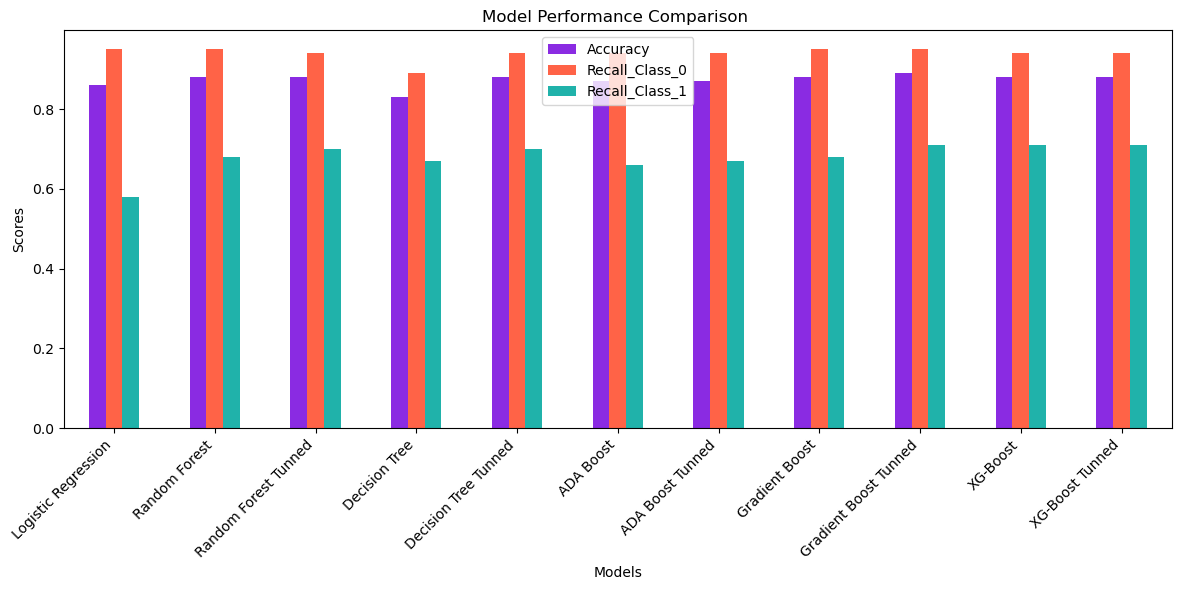

In [238]:
custom_colors = ['#8a2be2', '#ff6347', '#20b2aa']   # Blue, Orange, Green for each metric

Performance_matrix.plot(kind='bar', figsize=(12, 6), color=custom_colors)
plt.title('Model Performance Comparison ')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='best')
plt.tight_layout()
plt.show()